# Importing Data:

In [58]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

In [3]:
compdata_original = pd.read_csv('comp1data.csv', header=0, na_values = '-')
compdata_original.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


# Descriptive Statistics

In [4]:
compdata_original.shape

# do we have enough data? - YES
# 682 rows and 22 columns

(682, 22)

In [5]:
compdata_original.describe(include='all')
compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [6]:
compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [7]:
# Create a copy of the data
compdata = compdata_original.copy()

# Variable Calculations

In [8]:
# Ratios:

    # ** How to find the ratio for T1 and T2... drop them
    # Should the other numbers be dropped? Make a new df with imputed/calculated numbers?

# Percentage of real words
compdata['T3_'] = (compdata['T3']/compdata['T2'])
# Percentage of long sentences
compdata['T4_'] = (compdata['T4']/compdata['T1'])
# Percentage of long words
compdata['T5_'] = (compdata['T5']/compdata['T2'])
# Percentage of positive words
compdata['S1_'] = (compdata['S1']/compdata['T2'])
# Percentage of negative words
compdata['S2_'] = (compdata['S2']/compdata['T2'])
# Percentage of uncertain words
compdata['S3_'] = (compdata['S3']/compdata['T2'])
compdata.head()

# Target & Control Variable Calculation

compdata['P(mid)'] = ((compdata['P(H)']+compdata['P(L)'])/2)

def p(row):
    if row['P(IPO)'] < row['P(mid)']:
        val = 1
    else:
        val = 0
    return val

def q(row):
    if row['P(1Day)'] > row['P(IPO)']:
        val = 1
    else:
        val = 0
    return val

def r(row):
    if row['C3'] >= 0:
        val = 1
    else:
        val = 0
    return val

def s(row):
    if row['P(IPO)'] > row['P(mid)']:
        val = (row['P(IPO)'] - row['P(mid)'])/row['P(mid)']*100
    else:
        val = 0
    return val

compdata['C3_'] = compdata.apply(r, axis=1)
compdata['C5_'] = compdata['C5']/compdata['C6'] 
compdata['C6_'] = compdata.apply(s, axis=1)
compdata['Y1'] = compdata.apply(p, axis=1)
compdata['Y2'] = compdata.apply(q, axis=1)

# Missing Data:

In [9]:
compdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 34 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
T3_        681 non-null float64
T4_        681 non-null float64
T5_        681 non-null float64
S1_        681 non-null float64
S2_        681 non-null float64
S3_        681 non-null float64
P(

In [10]:
compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
dtype: int64

## Drop Missing P Values as we cannot impute these.

In [11]:
# Drop missing P Values from DF

compdata = compdata.dropna(how='all', subset=['P(1Day)'])

In [12]:
compdata.isna().sum()

I1          0
I2          0
I3          0
P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C2          0
C3         24
C4          0
C5          0
C6          0
C7         60
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
T3_         0
T4_         0
T5_         0
S1_         0
S2_         0
S3_         0
P(mid)      0
C3_         0
C5_         0
C6_         0
Y1          0
Y2          0
dtype: int64

## Drop Rows with Missing T2 Values

In [13]:
# Drop the rows with mising T2 values
# Cannot do calculations with missing data on the number of words, the ratios will be 0 and create outliers

compdata.drop(compdata[compdata['T1'] == 0].index, inplace = True) 
compdata.drop(compdata[compdata['T2'] == 0].index, inplace = True) 
compdata.loc[compdata['T1'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2


In [14]:
compdata.loc[compdata['T2'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2


Now that we've dropped the missing P values, we simply need to impute C3 and C7 as they are the only remaining missing values in the dataframe.

## Impute C3 & C7

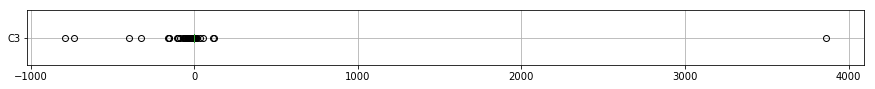

In [15]:
# C3 imputation
# check distribution to determine if mean or median should be used

compdata.boxplot(column='C3',vert=False, figsize=(15,1))

# since there are clear outliers, will use median.

In [16]:
compdata['Imputed_C3'] = compdata['C3'].fillna(compdata['C3'].median())

In [17]:
compdata.isna().sum()

I1             0
I2             0
I3             0
P(IPO)         0
P(H)           0
P(L)           0
P(1Day)        0
C1             0
C2             0
C3            24
C4             0
C5             0
C6             0
C7            60
T1             0
T2             0
T3             0
T4             0
T5             0
S1             0
S2             0
S3             0
T3_            0
T4_            0
T5_            0
S1_            0
S2_            0
S3_            0
P(mid)         0
C3_            0
C5_            0
C6_            0
Y1             0
Y2             0
Imputed_C3     0
dtype: int64

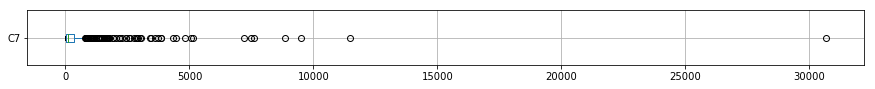

In [18]:
# C7 imputation
# check distribution to determine if mean or median should be used.


compdata.boxplot(column='C7',vert=False, figsize=(15,1))

# since there are clear outliers, will use median.

In [19]:
compdata['Imputed_C7'] = compdata['C7'].fillna(compdata['C7'].median())

In [20]:
compdata.isna().sum()

I1             0
I2             0
I3             0
P(IPO)         0
P(H)           0
P(L)           0
P(1Day)        0
C1             0
C2             0
C3            24
C4             0
C5             0
C6             0
C7            60
T1             0
T2             0
T3             0
T4             0
T5             0
S1             0
S2             0
S3             0
T3_            0
T4_            0
T5_            0
S1_            0
S2_            0
S3_            0
P(mid)         0
C3_            0
C5_            0
C6_            0
Y1             0
Y2             0
Imputed_C3     0
Imputed_C7     0
dtype: int64

## Identify values in I3 that have multiple values and replace them with 1.
- we discovered (via some handy Excel work) that some values in I3 had multiple SIC codes.
- need to replace these first.

In [21]:
compdata[compdata["I1"]=='DLB']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C3,Imputed_C7
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819",18.0,18.0,16.0,24.299999,90.0,1.0,0.47,...,0.00798,0.010793,17.0,1,3.540441,5.882353,0,1,0.47,289.041


In [22]:
compdata[compdata["I1"]=='DTSI']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C3,Imputed_C7
187,DTSI,"DTS, INC.","3651, 6794, 7819",17.0,16.0,14.0,24.92,76.0,0.0,0.99,...,0.011482,0.00846,15.0,1,3.410759,13.333333,0,1,0.99,41.056


In [23]:
compdata[compdata["I1"]=='RLD']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C3,Imputed_C7
499,RLD,RealD Inc.,"3663, 3861, 6794",16.0,15.0,13.0,19.51,98.0,1.0,-0.33,...,0.00874,0.014273,14.0,0,3.81107,14.285714,0,1,-0.33,39.675


In [24]:
compdata[compdata["I1"]=='UPG']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C3,Imputed_C7
620,UPG,UNIVERSAL POWER GROUP,"7389, 5063",7.0,9.0,7.0,7.35,101.0,0.0,0.38,...,0.008835,0.00956,8.0,1,1.666667,0.0,1,1,0.38,81.275


## Replace I3 values with one value.
- placed them in sensible industry based on the most common industries of the 4 values.

In [25]:
# adding to manufacturing 

compdata.I3.replace(to_replace ="6794, 3861, 3663, 7819", value ="3000", inplace=True)

In [26]:
# adding to nonclassifiable 

compdata.I3.replace(to_replace ="3651, 6794, 7819", value ="9900", inplace=True)

In [27]:
# adding to manufacturing

compdata.I3.replace(to_replace ="3663, 3861, 6794", value ="3000", inplace=True)

In [28]:
# adding to nonclassifiable 

compdata.I3.replace(to_replace ="7389, 5063", value ="9900", inplace=True)

In [29]:
# adding to services

compdata.I3.replace(to_replace ="541990", value ="7000", inplace=True)

In [30]:
# make I3 a numerical column so we can properly bin

compdata["I3"] = pd.to_numeric(compdata["I3"])

## SIC Code Bins

| Range of SIC Codes | Division | 
| ------------ | ---------- | 
| 0100-0999 | Agriculture, Forestry and Fishing |
| 1000-1499 | Mining |
| 1800-1999 | not used |
| 2000-3999 | Manufacturing |
| 4000-4999 | Transportation, Communications, Electric, Gas and Sanitary service |
| 5000-5199 | Wholesale Trade |
| 5200-5999 | Retail Trade |
| 6000-6799 | Finance, Insurance and Real Estate |
| 7000-8999 | Services |
| 9100-9729 | Public Administration |
| 9900-9999 | Nonclassifiable |


In [31]:
def assign_I3_bins(I3):
    if I3 >= 100 and I3 <= 999:                    
        return(1)
    if I3 >= 1000 and I3 <= 1499:       
        return(2)
    if I3 >= 1500 and I3 <= 1799:       
        return(3)
    if I3 >= 1800 and I3 <= 1999:      
        return(4)
    if I3 >= 2000 and I3 <= 3999:                  
        return(5)
    if I3 >= 4000 and I3 <= 4999:                  
        return(6)
    if I3 >= 5000 and I3 <= 5199:                 
        return(7)
    if I3 >= 5200 and I3 <= 5999:                  
        return(8)
    if I3 >= 6000 and I3 <= 6799:                 
        return(9)
    if I3 >= 7000 and I3 <= 8999:                  
        return(10)
    if I3 >= 9100 and I3 <= 9729:                  
        return(11)   
    if I3 >= 9900 and I3 <= 9999:                  
        return(12)   
    
    # Creating a new column I3_bins in the dataframe

compdata['I3_bins'] = compdata['I3'].apply(assign_I3_bins)  

compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C3,Imputed_C7,I3_bins
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.010929,9.0,1,3.864345,11.111111,0,1,3.43,51.345,5
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.010876,9.0,0,12.028832,0.000000,1,0,-1.62,25.936,5
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.011403,13.0,0,3.369134,0.000000,1,0,-1.24,7.378,5
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.013319,15.0,0,3.299697,0.000000,1,1,-0.91,8.526,5
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.011261,20.0,1,3.726269,5.000000,0,1,0.07,632.298,6


## Analyze the Bins

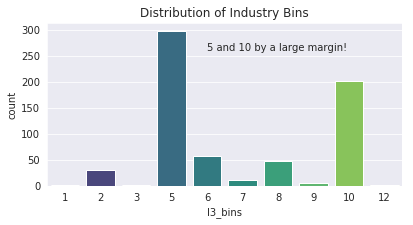

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,3))

# PLOT - distribution of industry bins
plt.subplot(1,2,1)
plt.text(4,260,"5 and 10 by a large margin!")
ax = sns.countplot(x="I3_bins", data=compdata, palette="viridis")
ax.set(title="Distribution of Industry Bins")

plt.show()

- it is clear that bin 5, which is Manufacturing, and bin 10, which is Services, dominate the distribution.
- the other remaining bins are not even close to the top 2, so let's bin these in an 'Other' category and only use 3 bins.

## SIC Code Bins (REVISED)

| Range of SIC Codes | Division | 
| ------------ | ---------- | 
| 0100-1999 | Other |
| 2000-3999 | Manufacturing |
| 4000-6799 | Other |
| 7000-8999 | Services |
| 9100-9999 | Other |


In [35]:
def assign_I3_bins_new(I3):
    if I3 >= 100 and I3 <= 1999:                          
        return(1)
    if I3 >= 2000 and I3 <= 3999:                  
        return(2)
    if I3 >= 4000 and I3 <= 6799:                  
        return(1)
    if I3 >= 7000 and I3 <= 8999:                  
        return(3)
    if I3 >= 9000 and I3 <= 9999:                  
        return(1)   
    
    # Creating a new column I3_bins in the dataframe

compdata['I3_bins_new'] = compdata['I3'].apply(assign_I3_bins_new)  

compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C3,Imputed_C7,I3_bins,I3_bins_new
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,9.0,1,3.864345,11.111111,0,1,3.43,51.345,5,2
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,9.0,0,12.028832,0.000000,1,0,-1.62,25.936,5,2
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,13.0,0,3.369134,0.000000,1,0,-1.24,7.378,5,2
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,15.0,0,3.299697,0.000000,1,1,-0.91,8.526,5,2
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,20.0,1,3.726269,5.000000,0,1,0.07,632.298,6,1


# Split DF into Separate DFs - Continuous and Categorical

## Categorical

In [35]:
# Create DF with only categorical features

compdata_cat = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','Imputed_C3', 'Imputed_C7'], axis=1)
compdata_cat.head()

,I1,I2,I3,C2,C3_,Y1,Y2,I3_bins,I3_bins_new
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.0,1,0,1,5,2
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.0,0,1,0,5,2
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,1.0,0,1,0,5,2
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.0,0,1,1,5,2
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.0,1,0,1,6,1


## Continuous 

In [38]:
# Create DF with only continuous features
# Drop C3, C7 as well since we have separate imputed columns for these 

compdata_cont = compdata.drop(['I1','I2','I3','C2','C3', 'C7','I3_bins','I3_bins_new','Y1','Y2','C3_'], axis=1)
compdata_cont.head()

,P(IPO),P(H),P(L),P(1Day),C1,C4,C5,C6,T1,T2,...,T4_,T5_,S1_,S2_,S3_,P(mid),C5_,C6_,Imputed_C3,Imputed_C7
0,10.0,9.5,8.5,11.870000,122.0,0.029074,40962052.0,10600000.0,470.0,12719.0,...,0.640426,0.054250,0.004875,0.009199,0.010929,9.0,3.864345,11.111111,3.43,51.345
1,8.0,10.0,8.0,7.250000,259.0,-0.013352,28869196.0,2400000.0,791.0,21792.0,...,0.644753,0.051395,0.003258,0.011105,0.010876,9.0,12.028832,0.000000,-1.62,25.936
2,7.0,14.0,12.0,6.700000,90.0,0.020715,16845668.0,5000000.0,201.0,5262.0,...,0.636816,0.061764,0.011593,0.006271,0.011403,13.0,3.369134,0.000000,-1.24,7.378
3,11.5,16.0,14.0,12.390000,209.0,0.020023,14848637.0,4500000.0,328.0,8259.0,...,0.539634,0.061630,0.009686,0.007144,0.013319,15.0,3.299697,0.000000,-0.91,8.526
4,21.0,21.0,19.0,56.599998,80.0,-0.034895,30741716.0,8250000.0,572.0,14830.0,...,0.587413,0.048550,0.004518,0.010047,0.011261,20.0,3.726269,5.000000,0.07,632.298


In [39]:
compdata_cont.isna().sum()

P(IPO)        0
P(H)          0
P(L)          0
P(1Day)       0
C1            0
C4            0
C5            0
C6            0
T1            0
T2            0
T3            0
T4            0
T5            0
S1            0
S2            0
S3            0
T3_           0
T4_           0
T5_           0
S1_           0
S2_           0
S3_           0
P(mid)        0
C5_           0
C6_           0
Imputed_C3    0
Imputed_C7    0
dtype: int64

# Outlier Detection

## Interquartile Ratio

In [40]:
compdata_cont.shape

(658, 27)

In [41]:
# Determine if there are any outliers in the data that will alter the results
# Use box plots for all the variables to visualize the outliers 
# Standardize first!

# only continuous

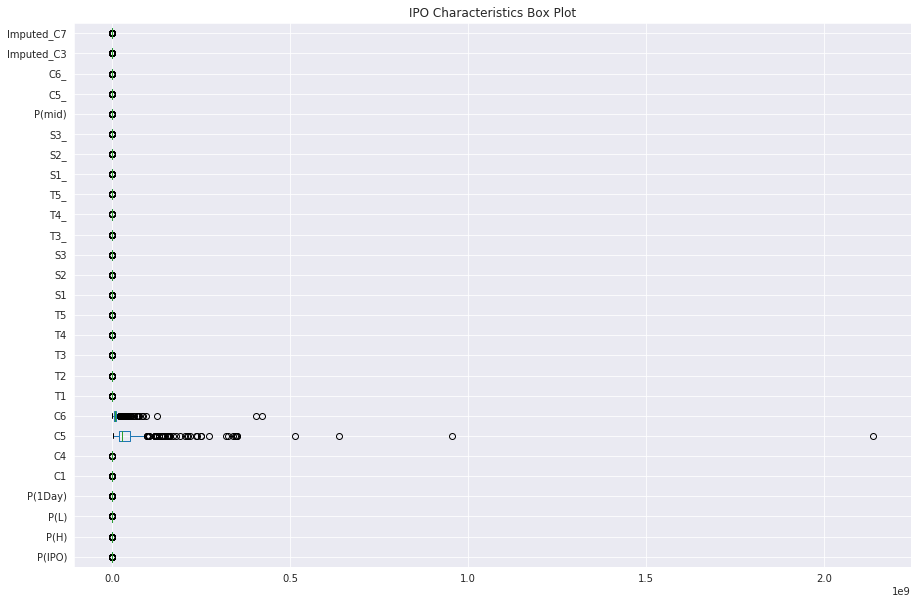

In [42]:
compdata_cont.boxplot(vert=False, figsize=(15,10))
plt.title('IPO Characteristics Box Plot')
plt.show()

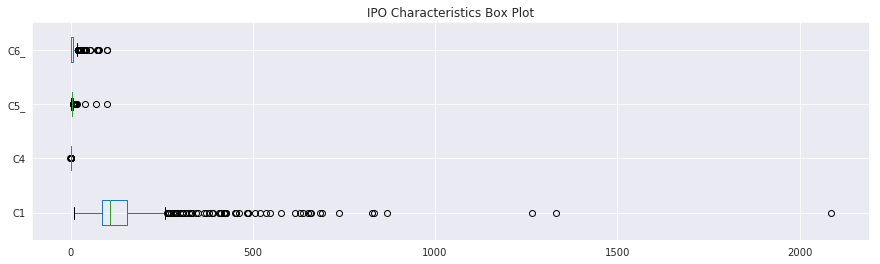

In [43]:
compdata_cont.boxplot(column=['C1','C4','C5_','C6_'],vert=False, figsize=(15,4))
plt.title('IPO Characteristics Box Plot')
plt.show()

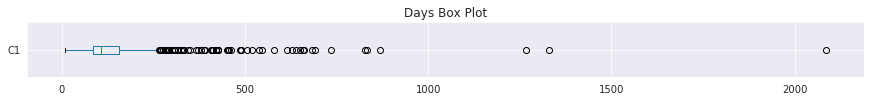

In [44]:
# In number of days

compdata_cont.boxplot(column=['C1'],vert=False, figsize=(15,1))
plt.title('Days Box Plot')
plt.show()

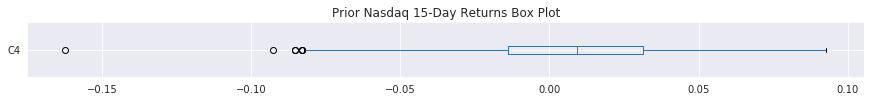

In [45]:
compdata_cont.boxplot(column='C4',vert=False, figsize=(15,1))
plt.title('Prior Nasdaq 15-Day Returns Box Plot')
plt.show()

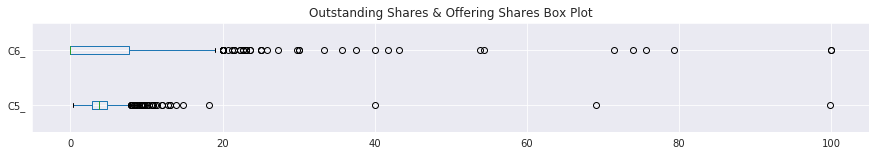

In [46]:
compdata_cont.boxplot(column=['C5_','C6_'],vert=False, figsize=(15,2))
plt.title('Outstanding Shares & Offering Shares Box Plot')
plt.show()

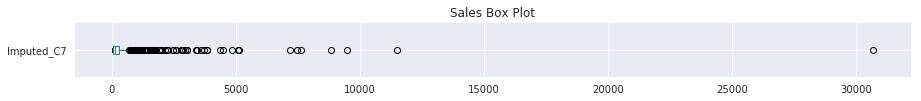

In [48]:
# in millions of dollars

compdata_cont.boxplot(column='Imputed_C7',vert=False, figsize=(15,1))
plt.title('Sales Box Plot')
plt.show()

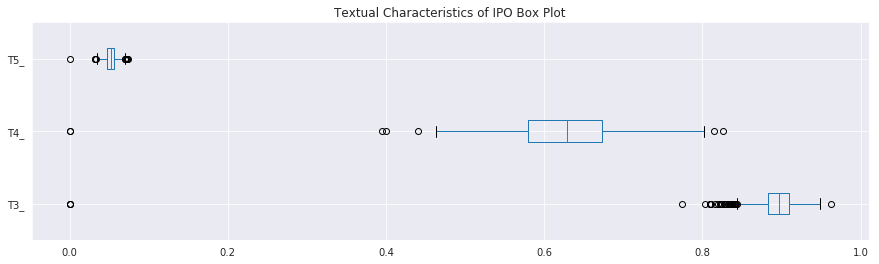

In [49]:
compdata_cont.boxplot(column=['T3_','T4_','T5_'],vert=False, figsize=(15,4))
plt.title('Textual Characteristics of IPO Box Plot')
plt.show()

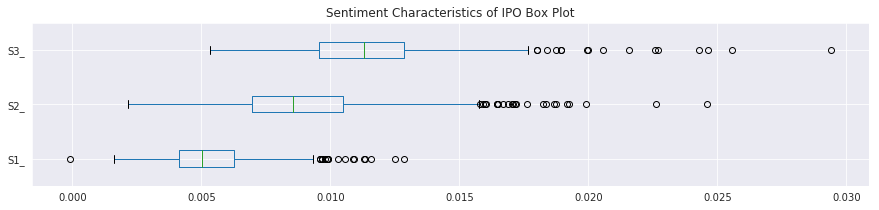

In [50]:
compdata_cont.boxplot(column=['S1_','S2_','S3_'],vert=False, figsize=(15,3))
plt.title('Sentiment Characteristics of IPO Box Plot')
plt.show()

It is obvious that there are outliers in the dataset that will offset the results. 
To remove this data we will use the interquartile range to determine the upper and lower bound limits and any data outside the limit will be converted to either the lower or upper bound number.

In [56]:
compdata_cont.head()

,P(IPO),P(H),P(L),P(1Day),C1,C4,C5,C6,T1,T2,...,T4_,T5_,S1_,S2_,S3_,P(mid),C5_,C6_,Imputed_C3,Imputed_C7
0,10.0,9.5,8.5,11.8700,122.0,0.029074,40962052.0,10600000.0,470.0,12719.0,...,0.640426,0.054250,0.004875,0.009199,0.010929,9.0,3.864345,11.111111,2.2075,51.345
1,8.0,10.0,8.0,7.2500,259.0,-0.013352,28869196.0,2400000.0,791.0,21792.0,...,0.644753,0.051395,0.003258,0.011105,0.010876,9.0,7.867911,0.000000,-1.6200,25.936
2,7.0,14.0,12.0,6.7000,90.0,0.020715,16845668.0,5000000.0,201.0,5262.0,...,0.636816,0.061764,0.009436,0.006271,0.011403,13.0,3.369134,0.000000,-1.2400,7.378
3,11.5,16.0,14.0,12.3900,209.0,0.020023,14848637.0,4500000.0,328.0,8259.0,...,0.539634,0.061630,0.009436,0.007144,0.013319,15.0,3.299697,0.000000,-0.9100,8.526
4,21.0,21.0,19.0,34.7375,80.0,-0.034895,30741716.0,8250000.0,572.0,14830.0,...,0.587413,0.048550,0.004518,0.010047,0.011261,20.0,3.726269,5.000000,0.0700,632.298


In [51]:
for col in compdata_cont.columns:
    u_bound = compdata_cont[col].quantile(0.75) + (1.5*(compdata_cont[col].quantile(0.75)-compdata_cont[col].quantile(0.25)))
    compdata_cont[col][compdata_cont[col] > u_bound] = u_bound

In [52]:
for col in compdata_cont.columns:
    l_bound = compdata_cont[col].quantile(0.25) - (1.5*(compdata_cont[col].quantile(0.75)-compdata_cont[col].quantile(0.25)))
    compdata_cont[col][compdata_cont[col] < l_bound] = l_bound

In [53]:
compdata_cont.head()

,P(IPO),P(H),P(L),P(1Day),C1,C4,C5,C6,T1,T2,...,T4_,T5_,S1_,S2_,S3_,P(mid),C5_,C6_,Imputed_C3,Imputed_C7
0,10.0,9.5,8.5,11.8700,122.0,0.029074,40962052.0,10600000.0,470.0,12719.0,...,0.640426,0.054250,0.004875,0.009199,0.010929,9.0,3.864345,11.111111,2.2075,51.345
1,8.0,10.0,8.0,7.2500,259.0,-0.013352,28869196.0,2400000.0,791.0,21792.0,...,0.644753,0.051395,0.003258,0.011105,0.010876,9.0,7.867911,0.000000,-1.6200,25.936
2,7.0,14.0,12.0,6.7000,90.0,0.020715,16845668.0,5000000.0,201.0,5262.0,...,0.636816,0.061764,0.009436,0.006271,0.011403,13.0,3.369134,0.000000,-1.2400,7.378
3,11.5,16.0,14.0,12.3900,209.0,0.020023,14848637.0,4500000.0,328.0,8259.0,...,0.539634,0.061630,0.009436,0.007144,0.013319,15.0,3.299697,0.000000,-0.9100,8.526
4,21.0,21.0,19.0,34.7375,80.0,-0.034895,30741716.0,8250000.0,572.0,14830.0,...,0.587413,0.048550,0.004518,0.010047,0.011261,20.0,3.726269,5.000000,0.0700,632.298


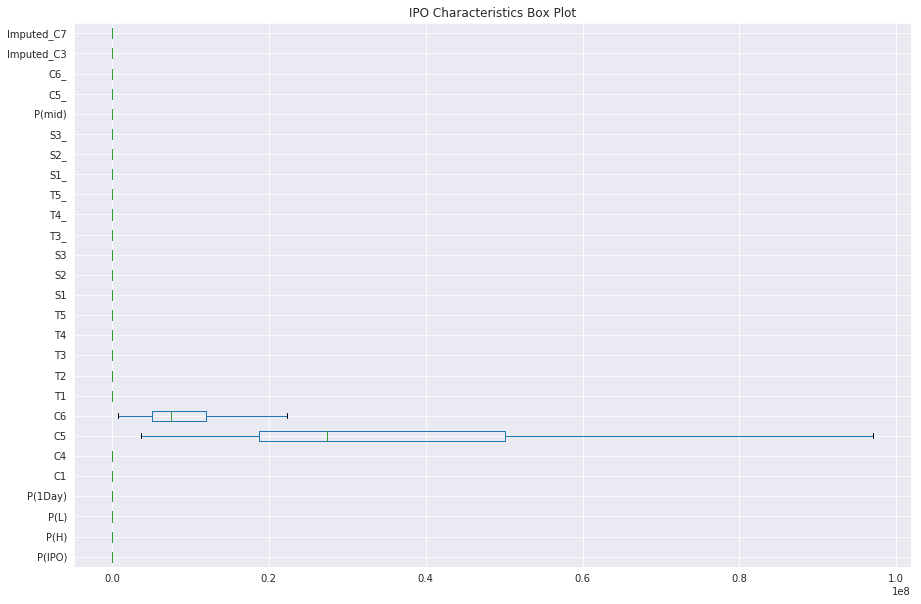

In [54]:
compdata_cont.boxplot(vert=False, figsize=(15,10))
plt.title('IPO Characteristics Box Plot')
plt.show()

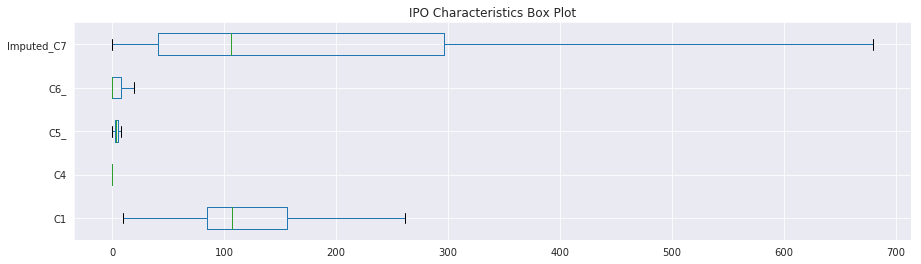

In [59]:
compdata_cont.boxplot(column=['C1','C4','C5_','C6_','Imputed_C7'],vert=False, figsize=(15,4))
plt.title('IPO Characteristics Box Plot')
plt.show()

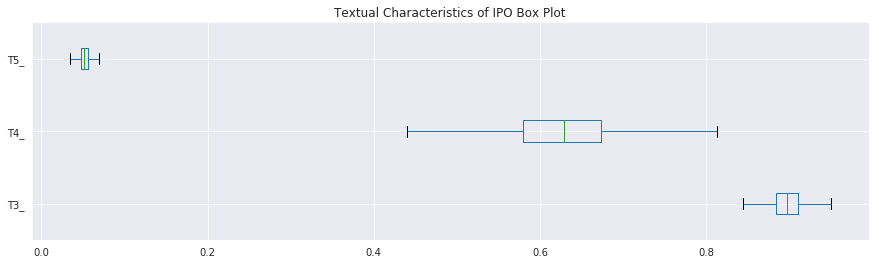

In [60]:
compdata_cont.boxplot(column=['T3_','T4_','T5_'],vert=False, figsize=(15,4))
plt.title('Textual Characteristics of IPO Box Plot')
plt.show()

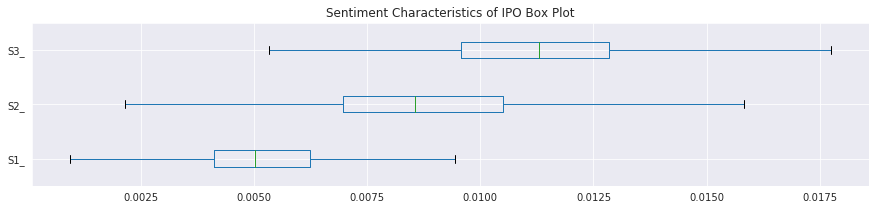

In [61]:
compdata_cont.boxplot(column=['S1_','S2_','S3_'],vert=False, figsize=(15,3))
plt.title('Sentiment Characteristics of IPO Box Plot')
plt.show()

In [62]:
# Did not need.. used a for loop instead

# Q1 = compdata['P(IPO)'].quantile(0.25)
# Q3 = compdata['P(IPO)'].quantile(0.75)
# IQR = Q3 - Q1
# LowerBound = Q1 - (1.5 * IQR)
# UpperBound = Q3 + (1.5 * IQR)

# compdata[((compdata['P(IPO)'] < LowerBound) |(compdata['P(IPO)'] > UpperBound))]

# This dataframe has rows for the IQR Upper Bound and Lower Bound numbers for each variable

# iqrdata.loc['IQR'] = (iqrdata.loc['75%']-iqrdata.loc['25%'])
# iqrdata.loc['UpperRange'] = (iqrdata.loc['75%']+(1.5*iqrdata.loc['IQR']))
# iqrdata.loc['LowerRange'] = (iqrdata.loc['25%']-(1.5*iqrdata.loc['IQR']))
# iqrdata

In [52]:
# Normalization
#... zscore

# Z-Score 

In [63]:
from scipy.stats import zscore

compdata_cont = compdata_cont.apply(zscore)
compdata_cont.head()

,P(IPO),P(H),P(L),P(1Day),C1,C4,C5,C6,T1,T2,...,T4_,T5_,S1_,S2_,S3_,P(mid),C5_,C6_,Imputed_C3,Imputed_C7
0,-0.809569,-1.526258,-1.311117,-0.582415,-0.079047,0.662868,0.120660,0.177765,0.052979,0.006978,...,0.181717,0.317074,-0.241226,0.089518,-0.190867,-1.415988,-0.092283,1.046981,1.987523,-0.686322
1,-1.235581,-1.392117,-1.449047,-1.153892,2.048280,-0.633739,-0.336431,-1.194415,2.163933,1.946017,...,0.243903,-0.105532,-1.217182,0.789992,-0.212047,-1.415988,2.342438,-0.680543,-1.090860,-0.797739
2,-1.448588,-0.318987,-0.345605,-1.221925,-0.575940,0.407395,-0.790901,-0.759334,-1.716013,-1.586697,...,0.129852,1.429507,2.512683,-0.986264,-0.001387,-0.329785,-0.393440,-0.680543,-0.785233,-0.879116
3,-0.490060,0.217578,0.206116,-0.518093,1.271883,0.386250,-0.866385,-0.843003,-0.880838,-0.946192,...,-1.266513,1.409691,2.512683,-0.665696,0.764685,0.213316,-0.435667,-0.680543,-0.519821,-0.874082
4,1.533499,1.558990,1.585418,2.246208,-0.731220,-1.292131,-0.265653,-0.215482,0.723750,0.458131,...,-0.580005,-0.526693,-0.456596,0.401275,-0.057974,1.571069,-0.176253,0.096843,0.268374,1.861134


## Skewness 

In [53]:
compdata['C4'].skew()

-0.4804640634278896

In [54]:
compdata['C5'].skew()

13.440972035815504

In [55]:
compdata['C6'].skew()

12.438050101872676

In [56]:
compdata['C7'].skew()

11.618743512772395

In [57]:
compdata['T3_'].skew()

-11.933706139550287

In [58]:
compdata['T4_'].skew()

-1.611424629084586

In [59]:
compdata['T5_'].skew()

-0.48457671733391683

In [60]:
compdata['S1_'].skew()

0.8934439405784013

In [61]:
compdata['S2_'].skew()

1.1882640878510211

In [62]:
compdata['S3_'].skew()

1.397555013879015

In [63]:
# must revisit these histograms.  

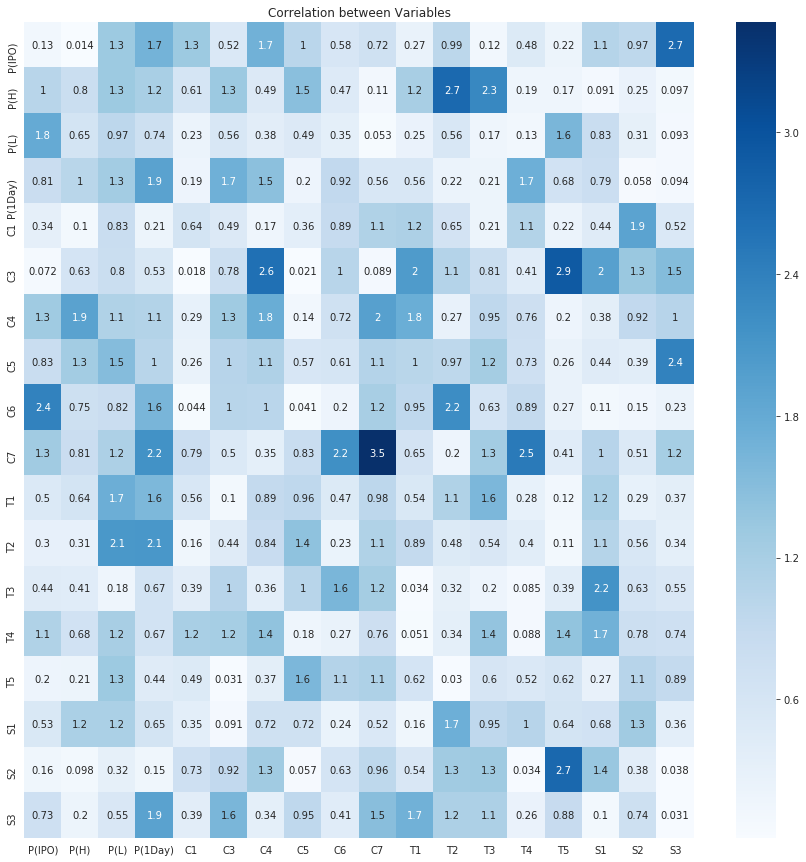

In [64]:
# Correlation between Variables

index= ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
cols = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
df = DataFrame(abs(np.random.randn(18,18)), index=index,  columns=cols)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df, annot=True, cbar=True, cmap='Blues')
plt.title("Correlation between Variables")
plt.show()